<a href="https://colab.research.google.com/github/hideaki-kyutech/test/blob/master/02_softcomputing_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# generate data
N = 20

X = np.random.random(N)*10-5 # [-5, 5) uniform random value
Y = 0.5*X-1 + np.random.randn(N) # normal distribution (0,1) = Gaussian Noise

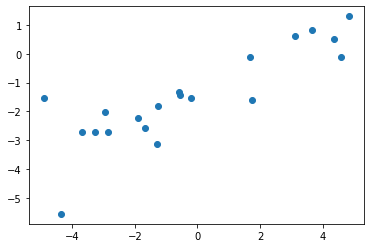

In [ ]:
plt.scatter(X,Y);

In [ ]:
model = nn.Linear(1,1)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
X = X.reshape(N,1)
Y = Y.reshape(N,1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [ ]:
# Training
n_epochs = 30
losses = []
for it in range(n_epochs):
  optimizer.zero_grad() 

  # forward process
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())

  # backward process
  loss.backward()
  optimizer.step()

  print(f'Epoch: {it+1}/{n_epochs}, Loss: {loss.item():4f}')

Epoch: 1/30, Loss: 16.700150
Epoch: 2/30, Loss: 12.401237
Epoch: 3/30, Loss: 9.298518
Epoch: 4/30, Loss: 7.046323
Epoch: 5/30, Loss: 5.402820
Epoch: 6/30, Loss: 4.197665
Epoch: 7/30, Loss: 3.310033
Epoch: 8/30, Loss: 2.653662
Epoch: 9/30, Loss: 2.166574
Epoch: 10/30, Loss: 1.803970
Epoch: 11/30, Loss: 1.533284
Epoch: 12/30, Loss: 1.330724
Epoch: 13/30, Loss: 1.178820
Epoch: 14/30, Loss: 1.064696
Epoch: 15/30, Loss: 0.978817
Epoch: 16/30, Loss: 0.914104
Epoch: 17/30, Loss: 0.865282
Epoch: 18/30, Loss: 0.828413
Epoch: 19/30, Loss: 0.800544
Epoch: 20/30, Loss: 0.779464
Epoch: 21/30, Loss: 0.763508
Epoch: 22/30, Loss: 0.751425
Epoch: 23/30, Loss: 0.742270
Epoch: 24/30, Loss: 0.735331
Epoch: 25/30, Loss: 0.730069
Epoch: 26/30, Loss: 0.726079
Epoch: 27/30, Loss: 0.723052
Epoch: 28/30, Loss: 0.720755
Epoch: 29/30, Loss: 0.719012
Epoch: 30/30, Loss: 0.717689


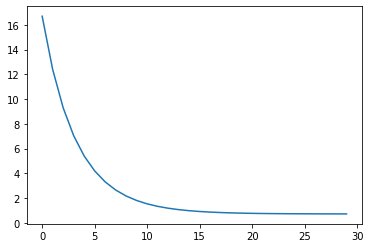

In [ ]:
plt.plot(losses);

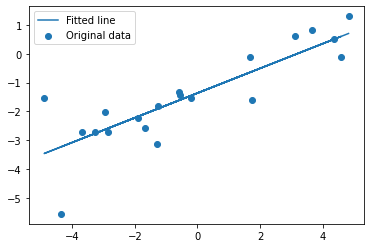

In [ ]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.4281043]] [-1.362674]
